<a href="https://colab.research.google.com/github/mertkaya13/Forestfires-Prediction-with-Machine-Learning/blob/master/Forestfires_prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by Mert KAYA - Last Update : 17 July 2020

This project aims to predict forestfires with the help of Machine Learning by given estimated values of temperature,amount of rain,speed of the wind etc.

There are predicters created for various usages.

Which would help us predict a forestfire according to the dataset.
I have created four different versions by the following steps you can see below.

-

First predicter uses values that are more common for everday people such as temperature,amount of rain,speed of wind as such and returns the burned area as hectars.
These values can be gathered from various websites or other places(eg. Newspapers) because they are predicted daily,weekly,monthly by meteorology companies.This predictor will use different models to predict burned hectars as numbers with regression.4 models are used in this part :
Ordinary least squares regression ,lasso linear regression, ridge linear regression ,knn regression.

-

Before the creation of the second predicter target values are splitted with the help of kmeans algorithm.These centroids values are used to determine the classes and Fuzzying the data.

These 5 classes are called : 

1.   Very low.(Amount of forest burned is very low or zero)
2.   Low (Amount of forest burned is low)
3.   Medium (Amount of forest burned is medium)
4.   High (Amount of forest burned is large)
5.   Very High (Amount of forest burned is very large) 

-

Second predicter uses same values which are 
Month, DayofWeek, Temperature as Celcius, Relative_Humidity,Wind in km/h,amount of rain outside in mm/m^2.

Month values are grouped into seasons. UI will recieve month but it will transform it to seasons for northern hemisphere.Then the seasons are transformed into numerical.
DayofWeek values are transformed into weekend,weekdays and transformed into numerical 1, 2.

-

Third predicter uses all of the features except FWI values of the dataset. This predicter can be used to achieve the amount of fire as a category as shown above.It can be used to understand importance of the part that forestfire happens(Middle of the forest may be more flammable than other parts.)

-

Fourth Predicter uses all of the features.

-

Classifiers used in these predicters are , KNearest Neighbours , Logistic Regression Classifier, Support Vector Machines, Multi-layer Perceptron classifier , GaussianProcessClassifier



First of all we need to show the source of our dataset.


Citation Request:
  This dataset is public available for research. The details are described in [Cortez and Morais, 2007]. 
  Please include this citation if you plan to use this database:

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf



  Our dataset is combined from two different datasets.
  Former is data collected from Montesinhonatural park.
  The data used in the experiments was collected from January 2000 to    December 2003. It containes month,day of week, spatial location within a 9×9 grid and the six components of the FWI systemand the total burned area.
  Latter contains information about the weather at that moment.

  

First we need to import pandas to use our dataset.
Numpy for various calculations and scikit-learn for regression.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt  #For plot
from sklearn.model_selection import train_test_split #Splitting the data train and test
from sklearn import metrics
import seaborn as sns #For plot
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Then we use pandas to get the .csv file (Which is the data of dataset) from the link.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
df = pd.read_csv(url)

This is how our dataset looks like.

In [ ]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


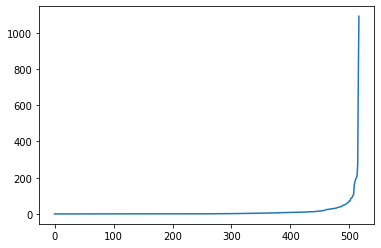

In [ ]:
area_temp = df['area']
area_temp = area_temp.sort_values()
plt.plot(range(len(area_temp)),area_temp)

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


We remove the X and Y columns of our dataset. Those values are used to declare which part of the naturalpark the forestfire occured as coordinates.(X,Y)
We will remove FWI values too.
The reason we are using those is to achieve a model to be used on general scale.


In [ ]:
df2 = df.drop(['X', 'Y','FFMC','DMC','DC','ISI','month','day'], axis = 1) 

We cannot use the month and day values because they are categorical and using them in regression would be stating a relation between them.

Our dataset will look like this.

In [ ]:
df2

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.00
1,18.0,33,0.9,0.0,0.00
2,14.6,33,1.3,0.0,0.00
3,8.3,97,4.0,0.2,0.00
4,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...
512,27.8,32,2.7,0.0,6.44
513,21.9,71,5.8,0.0,54.29
514,21.2,70,6.7,0.0,11.16
515,25.6,42,4.0,0.0,0.00


We will use the area value as Y(target) value.

In [ ]:
X = df2.drop(columns=['area'])
y = df2['area']

We have splitted the data as %20 train and %80 test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


We will fit our model with Least Squares Linear Regression.

In [ ]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

To check the accuracy of our model we will use MSE.

In [ ]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 25.884922040576985



Let's use Ridge Linear Regression.Learning rate as 0.01 is from trial and error.

In [ ]:
ridge_regressor = Ridge(alpha=0.01, fit_intercept=True, normalize=True, copy_X=True, max_iter=10000, tol=0.000001, solver='sag', random_state=None)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, random_state=None, solver='sag', tol=1e-06)

In [ ]:
y_ridge_pred = ridge_regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_ridge_pred))  

Mean Absolute Error: 25.881021858832774


Let's check the accuracy for Lasso Linear Regression.

In [ ]:
lasso_regressor =  Lasso(alpha=0.1, fit_intercept=True, normalize=False, precompute=False, copy_X=True, warm_start=False, positive=False, random_state=None, selection='cyclic')
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_lasso_pred = lasso_regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_lasso_pred))  

Mean Absolute Error: 25.88306534228093


Let's check the knn regression too. Higher error in knn regression is expected data is not scattered and mostly 0.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
kneigh_pred = knn_regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, kneigh_pred))  

Mean Absolute Error: 26.909384615384617


Created the residual plot to check linearity.


In [ ]:
residuals = []
for i in range(len(y_ridge_pred)):
  residuals.append(y_test.values[i] - y_ridge_pred[i])

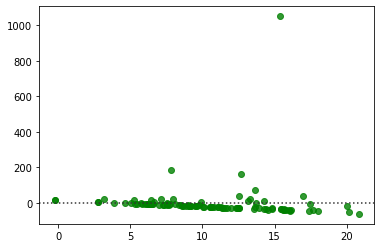

In [ ]:
sns.residplot(x=y_ridge_pred , y=residuals , data='auto', color='green')

# Display the plot
plt.show()


To check the predictions of the models ,
You can enter the inputs for todays and check the values.
inputs : 
RH - relative humidity in %: 15.0 to 100
wind - wind speed in km/h: 0.40 to 9.40
rain - outside rain in mm/m2 : 0.0 to 6.4
area - the burned area of the forest (in ha): 0.00 to 1090.84 

From the runtime section above press run-all button.

Some clarification about the output values:

-Data is somewhat linear which means that KNN Regression will not provide a great answer.
-Lasso Regression gets the absolute value of each weight which adds tendency to output bigger values.

In [ ]:
 
 
#@title Regression Predictions for Burned Area of Forest in a Forest Fire 
 
Celcius_Temperature = 1000.0 #@param {type:"number"}
Relative_Humidity = 60.0 #@param {type:"number"}
Wind = 10.0 #@param {type:"number"}
Rain =  0#@param {type:"number"}
 
value_array = [Celcius_Temperature,Relative_Humidity,Wind,Rain]
value_array = np.array(value_array).reshape(1,-1)


area_burned = regressor.predict(value_array)
if (area_burned < 0 ):
  area_burned = 0


area_burned_ridge = ridge_regressor.predict(value_array)
if (area_burned_ridge < 0 ):
  area_burned_ridge = 0


area_burned_lasso = lasso_regressor.predict(value_array)
if (area_burned_lasso < 0 ):
  area_burned_lasso = 0


area_knn_regressor = knn_regressor.predict(value_array)
if (area_knn_regressor < 0 ):
  area_knn_regressor = 0
 
 
 
print("Predicted value for burned area is (According to machine learning model trained with :Ordinary least squares linear regression) : ",area_burned)
print("Predicted value for burned area is (According to machine learning model trained with :Ridge linear regression) : ",area_burned_ridge)
print("Predicted value for burned area is (According to machine learning model trained with :Lasso linear regression) : ",area_burned_lasso)
print("Predicted value for burned area is (According to machine learning model trained with :KNN regression) : ",area_knn_regressor)

Predicted value for burned area is (According to machine learning model trained with :Ordinary least squares linear regression) :  [721.21232114]
Predicted value for burned area is (According to machine learning model trained with :Ridge linear regression) :  [710.00448495]
Predicted value for burned area is (According to machine learning model trained with :Lasso linear regression) :  [702.8538679]
Predicted value for burned area is (According to machine learning model trained with :KNN regression) :  [8.776]


Let's use categorical values too.

In [ ]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Mapped:

Weekdays as : 1

Weekends as : 2

In [ ]:
df_numeric = df.copy()
df_numeric['day'] = df_numeric['day'].map({'mon' : 1,'tue':1,'wed':1,'thu':1,'fri':1,'sat':2,'sun':2})

Mapped :

Winter months (december, january, february) as 1

Autumn months (september, october, november) as 2

Summer months (june, july, august) as 3

Spring months (march,april,may) as 4


In [ ]:
df_numeric['month'] = df_numeric['month'].map({'dec':1,'jan':1,'feb':1,'mar':2,'apr':2,'may':2,'jun':3,'jul':3,'aug':3,'sep':4,'oct':4,'nov':4})

For the first classifiers X,Y and FWI values are removed.

In [ ]:
df3 = df_numeric.drop(['X', 'Y','FFMC','DMC','DC','ISI'], axis = 1) 

In [ ]:

df3

,month,day,temp,RH,wind,rain,area
0,2,1,8.2,51,6.7,0.0,0.00
1,4,1,18.0,33,0.9,0.0,0.00
2,4,2,14.6,33,1.3,0.0,0.00
3,2,1,8.3,97,4.0,0.2,0.00
4,2,2,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...
512,3,2,27.8,32,2.7,0.0,6.44
513,3,2,21.9,71,5.8,0.0,54.29
514,3,2,21.2,70,6.7,0.0,11.16
515,3,2,25.6,42,4.0,0.0,0.00


Data is splitted into X and Y data for training.

In [ ]:
df4 = df3.copy()
Y_data = df3['area']
X_data = df3.drop(columns=['area'])

Our data consists is mostly 0 and close to 0 values so we need to scale the data.

Without changing the position(ascending-descending) every data is filled into [0,1].

In [ ]:
df4 = df4.sort_values('area')

df4['area'] = df4['area']*10
for i in range(len(df4)):  
  if (df4.iloc[i,-1] > 2785 and df4.iloc[i,-1] < 2786):
    df4.iloc[i,-1] = 2200
  if (df4.iloc[i,-1] > 7000 and df4.iloc[i,-1] < 8000):
    df4.iloc[i,-1] = 2210
  if (df4.iloc[i,-1] > 8000):
    df4.iloc[i,-1] = 2220

for i in range(len(df4)):  
  df4.iloc[i,-1] = df4.iloc[i,-1]/2300
  df4.iloc[i,-1] = df4.iloc[i,-1]


Y_data = df4.iloc[:,-1]

In [ ]:
Y_data

0      0.000000
298    0.000000
299    0.000000
300    0.000000
302    0.000000
         ...   
236    0.873652
237    0.925565
479    0.956522
415    0.960870
238    0.965217
Name: area, Length: 517, dtype: float64

X axis represents the index of each data while Y axis is target value.

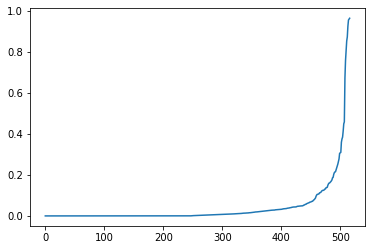

In [ ]:
plt.plot(range(len(Y_data)),Y_data)

Used the kmeans algorithm to split data into 5 clusters.

In [ ]:
Y_data_val = Y_data.values.reshape(-1,1)
kmeans = KMeans(n_clusters=5, random_state=0).fit(Y_data_val)

In [ ]:
kmeans.cluster_centers_

array([[0.0030944 ],
       [0.86404348],
       [0.34703986],
       [0.04306994],
       [0.15334903]])

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Trying the data for 10 and 100 clusters.

In [ ]:
kmeans_trial_1 = df4.copy()
kmeans_trial_2 = df4.copy()

Y_kmeans_10 = kmeans_trial_1['area']
Y_kmeans_100 = kmeans_trial_2['area']


Y_kmeans_10 = (Y_kmeans_10).values.reshape(-1, 1)
Y_kmeans_100 = (Y_kmeans_100).values.reshape(-1, 1)
kmeans_10 = KMeans(n_clusters=10, random_state=0).fit(Y_kmeans_10)
kmeans_100 = KMeans(n_clusters=100, random_state=0).fit(Y_kmeans_100)


Lets create models using these kmeans labels.

In [ ]:
logistic_regressor_kmeans = LogisticRegression(solver='sag' , max_iter=20000)

score_kmeans_5 = cross_val_score(logistic_regressor_kmeans, X_data, kmeans.labels_, cv=5)
print(" Kmeans with 5 , Accuracy: %0.4f (+/- %0.2f)" % (score_kmeans_5.mean(), score_kmeans_5.std() * 2))

score_kmeans_10 = cross_val_score(logistic_regressor_kmeans, X_data, kmeans_10.labels_, cv=5)
print("Kmeans with 10 , Accuracy: %0.4f (+/- %0.2f)" % (score_kmeans_10.mean(), score_kmeans_10.std() * 2))

score_kmeans_100 = cross_val_score(logistic_regressor_kmeans, X_data, kmeans_100.labels_, cv=5)
print("Kmeans with 100 , Accuracy: %0.4f (+/- %0.2f)" % (score_kmeans_100.mean(), score_kmeans_100.std() * 2))



 Kmeans with 5 , Accuracy: 0.6944 (+/- 0.05)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Kmeans with 10 , Accuracy: 0.6595 (+/- 0.02)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Kmeans with 100 , Accuracy: 0.4739 (+/- 0.03)


As seen above 5 clusters returns the highest accuracy.

We will label our target values with the clusters centers using fuzzyvalues.
Fuzzied value for a target with 0.50000 can be found with x = (0.5-closest lower point)/(closest upper point - closest lower point) , y = (closest upper point - 0.5)/(closest upper point - closest lower point)
Which ever one has the bigger value which means bigger membership degree will be used as target class.

In [ ]:
for i in range(len(df4)):  

  if (df4.iloc[i,-1] <= 0.0030944 ):
    df4.iloc[i,-1] = "verylow"


  elif (df4.iloc[i,-1] > 0.0030944 and df4.iloc[i,-1] < 0.04306994):
    valminuslower = df4.iloc[i,-1] - 0.0030944
    upminuslow = 0.04306994 - 0.0030944
    lowermembership = valminuslower/upminuslow
    upminusval = 0.04306994 - df4.iloc[i,-1]
    uppermembership = upminusval/upminuslow
    if (uppermembership > lowermembership):
      df4.iloc[i,-1] = "low"
    else :
      df4.iloc[i,-1] = "verylow"


  elif (df4.iloc[i,-1] >= 0.04306994 and df4.iloc[i,-1] < 0.15334903):
    valminuslower = df4.iloc[i,-1] - 0.04306994
    upminuslow = 0.15334903 - 0.04306994
    lowermembership = valminuslower/upminuslow
    upminusval = 0.15334903 - df4.iloc[i,-1]
    uppermembership = upminusval/upminuslow
    if (uppermembership > lowermembership):
      df4.iloc[i,-1] = "medium"
    else :
      df4.iloc[i,-1] = "low"


  elif (df4.iloc[i,-1] >= 0.15334903 and df4.iloc[i,-1] < 0.34703986):
    valminuslower = df4.iloc[i,-1] - 0.15334903
    upminuslow = 0.34703986 - 0.15334903
    lowermembership = valminuslower/upminuslow
    upminusval = 0.34703986 - df4.iloc[i,-1]
    uppermembership = upminusval/upminuslow
    if (uppermembership > lowermembership):
      df4.iloc[i,-1] = "high"
    else :
      df4.iloc[i,-1] = "medium"

    
  elif (df4.iloc[i,-1] >= 0.34703986 and df4.iloc[i,-1] < 0.86404348):
    valminuslower = df4.iloc[i,-1] - 0.34703986
    upminuslow = 0.86404348 - 0.34703986
    lowermembership = valminuslower/upminuslow
    upminusval = 0.86404348 - df4.iloc[i,-1]
    uppermembership = upminusval/upminuslow
    if (uppermembership > lowermembership):
      df4.iloc[i,-1] = "veryhigh"
    else :
      df4.iloc[i,-1] = "high"
  
  elif (df4.iloc[i,-1] >= 0.86404348):
    df4.iloc[i,-1] = "veryhigh"

How fuzzy values and 5 centroids effected our data.

In [ ]:
x = df4['area']
counts_array = np.array(np.unique(x, return_counts=True)).T

x1 = kmeans.labels_
counts_array1 = np.array(np.unique(x1, return_counts=True)).T
print("Counts with fuzzy values : ")
print(counts_array)
print("---------------------------------")
print("Counts with kmeans labeling where 0 = verylow , 1 = veryhigh , 2 = high , 3 = low , 4 = medium : ")
print(counts_array1)

Counts with fuzzy values : 
[['high' 20]
 ['low' 123]
 ['medium' 46]
 ['veryhigh' 11]
 ['verylow' 317]]
---------------------------------
Counts with kmeans labeling where 0 = verylow , 1 = veryhigh , 2 = high , 3 = low , 4 = medium : 
[[  0 368]
 [  1   9]
 [  2  12]
 [  3  92]
 [  4  36]]


In [ ]:
df3['area'] = df4['area']

df_numeric will be used in models later. 

In [ ]:
df_numeric['area'] = df4['area']


Y_labels = df3['area']
X_numeric = df3.drop('area',axis = 1)

X_numeric_for_XY = X_numeric.copy()#For models which will be created later
Y_labels_for_XY = Y_labels.copy()#For models which will be created later


X and Y values are shuffled for better understanding in cross validation

In [ ]:
X_numeric, Y_labels = shuffle(X_numeric, Y_labels)

KNN classifier with 3 neighbors selected(trial and error).

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
score_neigh = cross_val_score(neigh, X_numeric, Y_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score_neigh.mean(), score_neigh.std() * 2))

Accuracy: 0.51 (+/- 0.03)


Support vector machine with linear kernel.

In [ ]:
svm_linear = svm.SVC(kernel='linear', C=1)
score_svm = cross_val_score(svm_linear, X_numeric, Y_labels, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_svm.mean(), score_svm.std() * 2))

Accuracy: 0.6131 (+/- 0.00)


Support vector machine with polynomial kernel.

In [ ]:
svm_poly = svm.SVC(kernel='poly', C=1)
score_svm_poly = cross_val_score(svm_poly, X_numeric, Y_labels, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_svm_poly.mean(), score_svm_poly.std() * 2))

Accuracy: 0.6131 (+/- 0.00)


MLP classifier , uses Stochastic gradient descent as solver , learning rate is not constant , iteration limit is picked 20000 because it shouldn't end until local minima.

In [ ]:
mlp = MLPClassifier(max_iter=20000 , learning_rate='adaptive' ,solver = 'sgd')
score_mlp = cross_val_score(mlp, X_numeric, Y_labels, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_mlp.mean(), score_mlp.std() * 2))

Accuracy: 0.6151 (+/- 0.01)


Gaussian Process Classifier.

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
rbfn = GaussianProcessClassifier()
score_rbfn = cross_val_score(rbfn, X_numeric, Y_labels, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_rbfn.mean(), score_rbfn.std() * 2))

Accuracy: 0.4933 (+/- 0.06)


Our data is somewhat linear so logistic regression with stochastic average gradient(it will return great results with multiclass classification) is a good choice.

In [ ]:
logreg = LogisticRegression(solver='sag' , max_iter=20000)
score_log = cross_val_score(logreg, X_numeric, Y_labels, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_log.mean(), score_log.std() * 2))

Accuracy: 0.6151 (+/- 0.01)


All models are fitted with the data.

In [ ]:
svm_poly.fit(X_numeric,Y_labels)
neigh.fit(X_numeric,Y_labels)
mlp.fit(X_numeric,Y_labels)
rbfn.fit(X_numeric,Y_labels)
logreg.fit(X_numeric,Y_labels)
#print(mlp.coefs_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression and Multilayer Perceptron classifier can fit a data like this better than others so expect better results from them.

You can try the models here yourself.

After choosing each attribute from the menu above press runtime -> runall


In [ ]:
 
 
#@title Regression Predictions for Burned Area of Forest in a Forest Fire 
Month = 'August' #@param ["January", "February", "March" ,"April","May","June","July","August","September","October","November","December"]
DayofWeek = 'Saturday' #@param ["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"]
Celcius_Temperature =  50#@param {type:"number"}
Relative_Humidity = 0 #@param {type:"number"}
Wind =  100#@param {type:"number"}
Rain =  0#@param {type:"number"}
#ModelType = 'KNN classifier' #@param ["MultilayerPerceptronClassifier", "KNN classifier", "SVM classifier with poly kernel","Gaussian Process Classifier"]

MonthNum = 0
#Changing months to numbers as mapped before
if (Month == 'December' or Month == 'January' or Month == 'February'):
  MonthNum = 1
elif (Month == 'March' or Month == 'April' or Month == 'May'):
  MonthNum = 2
elif (Month == 'June' or Month == 'July' or Month == 'August'):
  MonthNum = 3
elif (Month == 'September' or Month == 'October' or Month == 'November'):
  MonthNum = 4

DayofWeekNum = 0
#Changing days to numbers for weekend or weekdays
if (DayofWeek == "Monday" or DayofWeek == "Tuesday" or DayofWeek == "Wednesday" or DayofWeek == "Thursday" or DayofWeek == "Friday" ):
  DayofWeekNum = 1
elif (DayofWeek == "Saturday" or DayofWeek == "Sunday"):
  DayofWeekNum = 2  

value_array = [MonthNum,DayofWeekNum,Celcius_Temperature,Relative_Humidity,Wind,Rain]
value_array = np.array(value_array).reshape(1,-1)


area_burned_class_svm = svm_poly.predict(value_array)
area_burned_class_knn = neigh.predict(value_array)
area_burned_class_mlp = mlp.predict(value_array)
area_burned_class_rbfn = rbfn.predict(value_array) 
area_burned_class_logreg = logreg.predict(value_array)

print("Predictions with high accuracy. Expect these : ")
print("Predicted status for a forest fire from logreg is :",area_burned_class_logreg)
print("Predicted status for a forest fire from mlp is :",area_burned_class_mlp)
print("")
print("Other models predictions are mostly very low due to the data : ")
print("Predicted status for a forest fire from svm is :",area_burned_class_svm)
print("Predicted status for a forest fire from knn is :",area_burned_class_knn)
print("Predicted status for a forest fire from rbfn is :",area_burned_class_rbfn)



Predictions with high accuracy. Expect these : 
Predicted status for a forest fire from logreg is : ['medium']
Predicted status for a forest fire from mlp is : ['veryhigh']

Other models predictions are mostly very low due to the data : 
Predicted status for a forest fire from svm is : ['verylow']
Predicted status for a forest fire from knn is : ['verylow']
Predicted status for a forest fire from rbfn is : ['verylow']


Let's create a model using X and Y values too. 

In [ ]:
X_numeric_for_XY['X'] = df_numeric['X']
X_numeric_for_XY['Y'] = df_numeric['Y']
#Y_labels_for_XY will be used. It contains unshuffled target values.

Same as above but with X and Y values : MLP classifier , uses Stochastic gradient descent as solver , learning rate is not constant , iteration limit is picked 20000 because it shouldn't end until local minima.

In [ ]:
mlp_XY = MLPClassifier(max_iter=20000 , learning_rate='adaptive' ,solver = 'sgd')
score_mlp_XY = cross_val_score(mlp_XY, X_numeric_for_XY, Y_labels_for_XY, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_mlp_XY.mean(), score_mlp_XY.std() * 2))

Accuracy: 0.6093 (+/- 0.01)


Same as above with X and Y values in features : Support vector machine with polynomial kernel

In [ ]:
svm_poly_XY = svm.SVC(kernel='poly', C=1)
score_svm_poly_XY = cross_val_score(svm_poly_XY, X_numeric_for_XY, Y_labels_for_XY, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_svm_poly_XY.mean(), score_svm_poly_XY.std() * 2))

Accuracy: 0.6131 (+/- 0.00)


Same as above with X and Y values in features : K Nearest Neigbors Classifier with K = 3.

In [ ]:
neigh_XY = KNeighborsClassifier(n_neighbors=3)
score_neigh_XY = cross_val_score(neigh_XY, X_numeric_for_XY, Y_labels_for_XY, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_neigh_XY.mean(), score_neigh_XY.std() * 2))

Accuracy: 0.4894 (+/- 0.03)


Same as above but with X and Y values in features.

In [ ]:
log_XY = LogisticRegression(solver='sag' , max_iter=20000)
score_log_XY = cross_val_score(log_XY_FWI, X_numeric_for_XY, Y_labels_for_XY, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_log_XY.mean(), score_log_XY.std() * 2))

Accuracy: 0.6112 (+/- 0.01)


All models are fitted.

In [ ]:
mlp_XY.fit(X_numeric_for_XY,Y_labels_for_XY)
svm_poly_XY.fit(X_numeric_for_XY,Y_labels_for_XY)
neigh_XY.fit(X_numeric_for_XY,Y_labels_for_XY)
log_XY.fit(X_numeric_for_XY,Y_labels_for_XY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

You can try the models here. Select values of attributes then from runtime -> runall

In [ ]:
 
 
#@title Regression Predictions for Burned Area of Forest in a Forest Fire 
X = '5' #@param [1,2,3,4,5,6,7,8,9]
Y = '5' #@param [1,2,3,4,5,6,7,8,9]
Month = 'August' #@param ["January", "February", "March" ,"April","May","June","July","August","September","October","November","December"]
DayofWeek = 'Saturday' #@param ["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"]
Celcius_Temperature =  50#@param {type:"number"}
Relative_Humidity = 0 #@param {type:"number"}
Wind =  100#@param {type:"number"}
Rain =  0#@param {type:"number"}
#ModelType = 'KNN classifier' #@param ["MultilayerPerceptronClassifier", "KNN classifier", "SVM classifier with poly kernel","Gaussian Process Classifier"]

MonthNum = 0
#Changing months to numbers as mapped before
if (Month == 'December' or Month == 'January' or Month == 'February'):
  MonthNum = 1
elif (Month == 'March' or Month == 'April' or Month == 'May'):
  MonthNum = 2
elif (Month == 'June' or Month == 'July' or Month == 'August'):
  MonthNum = 3
elif (Month == 'September' or Month == 'October' or Month == 'November'):
  MonthNum = 4

DayofWeekNum = 0
#Changing days to numbers for weekend or weekdays
if (DayofWeek == "Monday" or DayofWeek == "Tuesday" or DayofWeek == "Wednesday" or DayofWeek == "Thursday" or DayofWeek == "Friday" ):
  DayofWeekNum = 1
elif (DayofWeek == "Saturday" or DayofWeek == "Sunday"):
  DayofWeekNum = 2  

value_array_XY = [MonthNum,DayofWeekNum,Celcius_Temperature,Relative_Humidity,Wind,Rain,int(X),int(Y)]
value_array_XY = np.array(value_array_XY).reshape(1,-1)

area_burned_class_svm_XY = svm_poly_XY.predict(value_array_XY)
area_burned_class_knn_XY = neigh_XY.predict(value_array_XY)
area_burned_class_mlp_XY = mlp_XY.predict(value_array_XY) 
area_burned_class_logreg_XY = log_XY.predict(value_array_XY)

print("Predictions with high accuracy. Expect these : ")
print("Predicted status for a forest fire from logreg is :",area_burned_class_logreg_XY)
print("Predicted status for a forest fire from mlp is :",area_burned_class_mlp_XY)
print("")
print("Other models predictions are mostly very low due to the data : ")
print("Predicted status for a forest fire from svm is :",area_burned_class_svm_XY)
print("Predicted status for a forest fire from knn is :",area_burned_class_knn_XY)



Predictions with high accuracy. Expect these : 
Predicted status for a forest fire from logreg is : ['medium']
Predicted status for a forest fire from mlp is : ['verylow']

Other models predictions are mostly very low due to the data : 
Predicted status for a forest fire from svm is : ['verylow']
Predicted status for a forest fire from knn is : ['verylow']


Lets create models with XY and FWI values.

In [ ]:
X_numeric_XY_FWI = X_numeric_for_XY.copy() 
#Y_labels_for_XY values are unshuffled they will be used

FWI models added to X.

In [ ]:
X_numeric_XY_FWI['FFMC'] = df_numeric['FFMC']
X_numeric_XY_FWI['DMC'] = df_numeric['DMC']
X_numeric_XY_FWI['DC'] = df_numeric['DC']
X_numeric_XY_FWI['ISI'] = df_numeric['ISI']

Our data is in form of :

In [ ]:
X_numeric_XY_FWI.head()

,month,day,temp,RH,wind,rain,X,Y,FFMC,DMC,DC,ISI
0,2,1,8.2,51,6.7,0.0,7,5,86.2,26.2,94.3,5.1
1,4,1,18.0,33,0.9,0.0,7,4,90.6,35.4,669.1,6.7
2,4,2,14.6,33,1.3,0.0,7,4,90.6,43.7,686.9,6.7
3,2,1,8.3,97,4.0,0.2,8,6,91.7,33.3,77.5,9.0
4,2,2,11.4,99,1.8,0.0,8,6,89.3,51.3,102.2,9.6


Same as above but with X,Y and FWI values : MLP classifier , uses Stochastic gradient descent as solver , learning rate is not constant , iteration limit is picked 20000 because it shouldn't end until local minima.

In [ ]:
mlp_XY_FWI = MLPClassifier(max_iter=20000 , learning_rate='adaptive' ,solver = 'sgd')
score_mlp_XY_FWI = cross_val_score(mlp_XY_FWI, X_numeric_XY_FWI, Y_labels_for_XY, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_mlp_XY_FWI.mean(), score_mlp_XY_FWI.std() * 2))

Accuracy: 0.5044 (+/- 0.41)


Same as above but with FWI values : Support Vector Machine Classifier with polynomial kernel.

In [ ]:
svm_poly_XY_FWI = svm.SVC(kernel='poly', C=1)
score_svm_poly_XY_FWI = cross_val_score(svm_poly_XY_FWI, X_numeric_XY_FWI, Y_labels_for_XY, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_svm_poly_XY_FWI.mean(), score_svm_poly_XY_FWI.std() * 2))

Accuracy: 0.6131 (+/- 0.00)


Same as above but with FWI values : Logistic Regression Classifier with Stochastic Average Gradient solver.

In [ ]:
log_XY_FWI = LogisticRegression(solver='sag' , max_iter=20000)
score_log_XY_FWI = cross_val_score(log_XY_FWI, X_numeric_XY_FWI, Y_labels_for_XY, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_log_XY_FWI.mean(), score_log_XY_FWI.std() * 2))

Accuracy: 0.5957 (+/- 0.04)


X with FWI values too and KNN classifier with K = 3.

In [ ]:
neigh_XY_FWI = KNeighborsClassifier(n_neighbors=3)
score_neigh_XY_FWI = cross_val_score(neigh_XY_FWI, X_numeric_XY_FWI, Y_labels_for_XY, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (score_neigh_XY_FWI.mean(), score_neigh_XY_FWI.std() * 2))

Accuracy: 0.4523 (+/- 0.17)


All models are fitted.

In [ ]:
mlp_XY_FWI.fit(X_numeric_XY_FWI,Y_labels_for_XY)
neigh_XY_FWI.fit(X_numeric_XY_FWI,Y_labels_for_XY)
svm_poly_XY_FWI.fit(X_numeric_XY_FWI,Y_labels_for_XY)
log_XY_FWI.fit(X_numeric_XY_FWI,Y_labels_for_XY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Here is the predicter that uses all the features in the data.
Pick the values of attributes and click runall from runtime button in the menu top of the screen.

In [ ]:

#@title Regression Predictions for Burned Area of Forest in a Forest Fire 
FFMC = 0#@param {type:"number"}
DMC = 0#@param {type:"number"}
DC = 0#@param {type:"number"}
ISI = 0#@param {type:"number"}
X = '5' #@param [1,2,3,4,5,6,7,8,9]
Y = '5' #@param [1,2,3,4,5,6,7,8,9]
Month = 'August' #@param ["January", "February", "March" ,"April","May","June","July","August","September","October","November","December"]
DayofWeek = 'Saturday' #@param ["Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday","Sunday"]
Celcius_Temperature =  50#@param {type:"number"}
Relative_Humidity = 0 #@param {type:"number"}
Wind =  100#@param {type:"number"}
Rain =  0#@param {type:"number"}
#ModelType = 'KNN classifier' #@param ["MultilayerPerceptronClassifier", "KNN classifier", "SVM classifier with poly kernel","Gaussian Process Classifier"]

MonthNum = 0
#Changing months to numbers as mapped before
if (Month == 'December' or Month == 'January' or Month == 'February'):
  MonthNum = 1
elif (Month == 'March' or Month == 'April' or Month == 'May'):
  MonthNum = 2
elif (Month == 'June' or Month == 'July' or Month == 'August'):
  MonthNum = 3
elif (Month == 'September' or Month == 'October' or Month == 'November'):
  MonthNum = 4

DayofWeekNum = 0
#Changing days to numbers for weekend or weekdays
if (DayofWeek == "Monday" or DayofWeek == "Tuesday" or DayofWeek == "Wednesday" or DayofWeek == "Thursday" or DayofWeek == "Friday" ):
  DayofWeekNum = 1
elif (DayofWeek == "Saturday" or DayofWeek == "Sunday"):
  DayofWeekNum = 2  

value_array_XY_FWI = [MonthNum,DayofWeekNum,Celcius_Temperature,Relative_Humidity,Wind,Rain,int(X),int(Y),FFMC,DMC,DC,ISI]
value_array_XY_FWI = np.array(value_array_XY_FWI).reshape(1,-1)


area_burned_class_svm_XY_FWI = svm_poly_XY_FWI.predict(value_array_XY_FWI)
area_burned_class_knn_XY_FWI = neigh_XY_FWI.predict(value_array_XY_FWI)
area_burned_class_mlp_XY_FWI = mlp_XY_FWI.predict(value_array_XY_FWI) 
area_burned_class_logreg_XY_FWI = log_XY_FWI.predict(value_array_XY_FWI)

print("Predictions with high accuracy. Expect these : ")
print("Predicted status for a forest fire from logreg is :",area_burned_class_logreg_XY_FWI)
print("Predicted status for a forest fire from mlp is :",area_burned_class_mlp_XY_FWI)
print("")
print("Other models predictions are mostly very low due to the data : ")
print("Predicted status for a forest fire from svm is :",area_burned_class_svm_XY_FWI)
print("Predicted status for a forest fire from knn is :",area_burned_class_knn_XY_FWI)

Predictions with high accuracy. Expect these : 
Predicted status for a forest fire from logreg is : ['veryhigh']
Predicted status for a forest fire from mlp is : ['verylow']

Other models predictions are mostly very low due to the data : 
Predicted status for a forest fire from svm is : ['verylow']
Predicted status for a forest fire from knn is : ['verylow']
